In [1]:
import random
import timeit
import matplotlib.pyplot as plotter

In [2]:
def binarySearch(collection, element):
   
    size = len(collection)
    
    if size == 0 or element < collection[0] or element > collection[-1]:
        return -1
    
    # using a builtin function for this case shouldn't impact performance because it's only used on a small list
    if size < 2 and element in collection:
        result = collection.index(element)
        return result
    
    # Precalculating the floor division to avoid having to re-calculate it
    splitPoint = size//2
    
    firstCollection = collection[0:splitPoint]
    secondCollection = collection[splitPoint:size]
    
    if element <= firstCollection[-1]:
        result = binarySearch(firstCollection, element)
    else:
        result = splitPoint + binarySearch(secondCollection, element)   
    
    return result

In [3]:
def ternarySearch(collection, element):
   
    size = len(collection)
    
    if size == 0 or element < collection[0] or element > collection[-1]:
        return -1
    # using a builtin function for this case shouldn't impact performance because it's only used on a small list
    if size < 3 and element in collection:
        result = collection.index(element)
        return result
    
    # Precalculating the floor division to avoid having to re-calculate it
    baseSplitPoint = size//3
    
    firstCollection = collection[0:baseSplitPoint]
    secondCollection = collection[baseSplitPoint:baseSplitPoint*2]
    thirdCollection = collection[baseSplitPoint*2:size]
    
    if element <= firstCollection[-1]:
        result = ternarySearch(firstCollection, element)
    elif element <= secondCollection[-1]:
        result = baseSplitPoint + ternarySearch(secondCollection, element)
    else:
        result = baseSplitPoint*2 + ternarySearch(thirdCollection, element)   
    
    return result

In [7]:
minNumber = 1
maxNumber = 10000
iterations = 1000 
step = 100

binaryAverages = list()
ternaryAverages = list()

for n in range(minNumber, maxNumber, step):
    binaryIterationsAccumulator = 0
    ternaryIterationsAccumulator = 0

    for i in range(1, iterations):
        listN = list(range(1, n))
        
        randomElement = random.randint(1, n)
        
        binaryIterationsAccumulator += timeit.timeit(lambda: binarySearch(listN, randomElement), number = 1)
        ternaryIterationsAccumulator += timeit.timeit(lambda: ternarySearch(listN, randomElement), number = 1)
        
    binaryAverageTime = binaryIterationsAccumulator / iterations
    ternaryAverageTime = ternaryIterationsAccumulator / iterations
        
    binaryAverages.append(binaryAverageTime)
    ternaryAverages.append(ternaryAverageTime)        

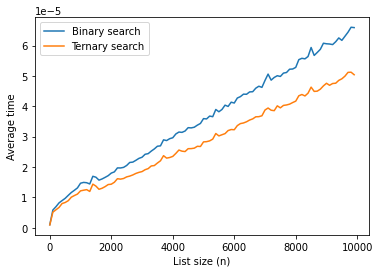

In [8]:
x = range(minNumber, maxNumber, step)
plotter.xlabel('List size (n)')
plotter.ylabel('Average time')

plotter.plot(x, binaryAverages, label = 'Binary search')
plotter.plot(x, ternaryAverages, label = 'Ternary search')

plotter.legend()